In [1]:
from context import *

In [2]:
from dreye.datasets import load_granada

In [3]:
daylight_spectra = load_granada(as_spectra=True)

In [4]:
mean_daylight = dreye.Spectrum(
    daylight_spectra[:, 0], 
    domain=daylight_spectra.domain,
    units='uE', name='daylight'
)(wls)

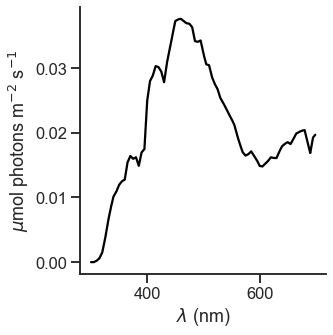

In [5]:
mean_daylight.plot(color='black')
plt.ylabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.tight_layout()
plt.savefig('light_spectrum.pdf')

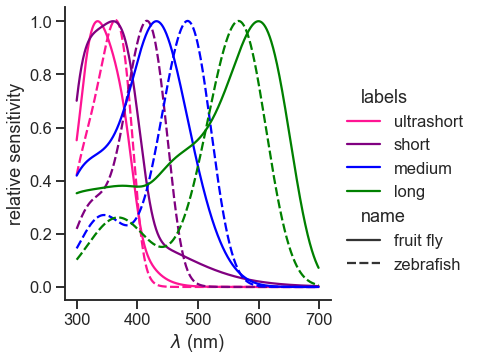

In [6]:
dreye.SignalsContainer([fly_opsins, fish_opsins]).plot(
    style='name', palette=cmap, hue='labels', col=None, 
    xlabel=r'$\lambda$ (nm)', 
    ylabel='relative sensitivity'
)
plt.savefig('sensitivities.pdf')

In [7]:
X_fly = fly_model.excitation(mean_daylight, return_units=False)
X_fish = fish_model.excitation(mean_daylight, return_units=False)

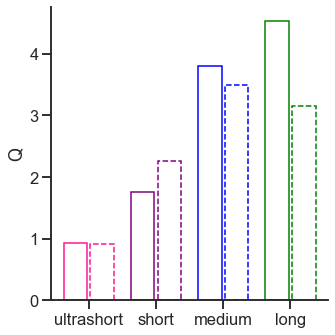

In [8]:
plt.figure(figsize=(5, 5))
plt.bar(np.arange(n)-0.2, X_fly[0], width=0.35, color='white', edgecolor=cmap.values())
plt.bar(np.arange(n)+0.2, X_fish[0], width=0.35, color='white', edgecolor=cmap.values(), linestyle='--')
plt.xticks(np.arange(n), cmap)
plt.ylabel('Q')
sns.despine()
plt.tight_layout()
plt.savefig('Q-daylight.pdf')

In [9]:
mpeaks = [380, 470, 565]
mnames = ['uv', 'blue', 'lime']
mcolors = ['magenta', 'cyan', 'lime']
measured_spectra = dreye.get_led_spectra_container(mpeaks, names=mnames)

In [10]:
led_cmap = dict(zip(measured_spectra.names, mcolors))

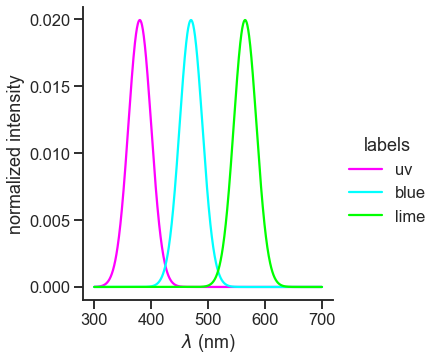

In [11]:
measured_spectra.normalized_spectra.plot(palette=led_cmap, ylabel='normalized intensity')
plt.savefig('LEDs.pdf')

In [12]:
fly_emodel = dreye.IndependentExcitationFit(
    photoreceptor_model=fly_model, 
    measured_spectra=measured_spectra, 
    ignore_bounds=True
)
fish_emodel = dreye.IndependentExcitationFit(
    photoreceptor_model=fish_model, 
    measured_spectra=measured_spectra, 
    ignore_bounds=True
)

In [13]:
fly_emodel.fit(X_fly)
fish_emodel.fit(X_fish)

IndependentExcitationFit(ignore_bounds=True,
                         measured_spectra=MeasuredSpectraContainer([[0.0 7.435248233314816e-05 0.00014870496466629632 ...  0.0005204673763320371 0.0005948198586651853 0.0006691723409983334] [0.0 8.21465263603624e-05 0.0001642930527207248 ...  0.0005750256845225367 0.0006571722108828992 0.0007393187372432615] [0.0 9.070088000815544e-05 0.0001814017....5656640620244604e-10] [0.0 3.34979223608673e-11 6.69958447217346e-11 ...  2.3448545652607105e-10 2.679833788869384e-10 3.0148130124780565e-10] [0.0 2.8305210882674662e-11 5.6610421765349323e-11 ...  1.9813647617872262e-10 2.264416870613973e-10 2.5474689794407197e-10]] microspectral_E_Q),
                         photoreceptor_model=LinearPhotoreceptor('ultrashort', 'short', 'medium', 'long'))

In [14]:
fly_fitted_spectra = measured_spectra.ints_to_spectra(
    fly_emodel.fitted_intensities_, 
    bounds_error=False, 
    fill_value='extrapolate'
)
fly_fitted_spectra.name = 'fruit fly'
fish_fitted_spectra = measured_spectra.ints_to_spectra(
    fish_emodel.fitted_intensities_, 
    bounds_error=False, 
    fill_value='extrapolate'
)
fish_fitted_spectra.name = 'zebrafish'

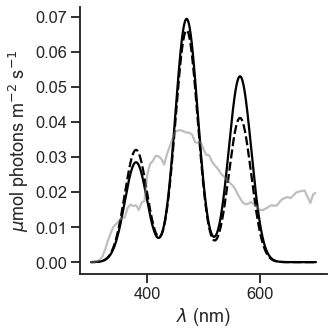

In [15]:
g = dreye.SignalsContainer(
    [fly_fitted_spectra, fish_fitted_spectra]
).plot(
    style='name', col=None, hue=None, color='black', 
    xlabel='$\lambda$ (nm)', 
    ylabel=r'$\mu$mol photons m$^{-2}$ s$^{-1}$', 
    legend=False
)
plt.plot(wls, mean_daylight.magnitude, color='gray', alpha=0.5)
plt.tight_layout()
plt.savefig('fitted_spectra.pdf')

In [16]:
fish_scores = fish_emodel.feature_scores(method='rel')
fly_scores = fly_emodel.feature_scores(method='rel')

In [17]:
fly_scores

array([-9.76244712e-04,  3.98021266e-04, -2.62584355e-05,  0.00000000e+00])

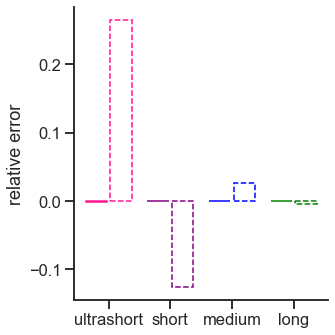

In [18]:
plt.figure(figsize=(5, 5))
plt.bar(np.arange(n)-0.2, fly_scores, width=0.35, color='white', edgecolor=cmap.values())
plt.bar(np.arange(n)+0.2, fish_scores, width=0.35, color='white', edgecolor=cmap.values(), linestyle='--')
plt.xticks(np.arange(n), cmap)
plt.ylabel('relative error')
sns.despine()
plt.tight_layout()
plt.savefig('relative_error.pdf')